In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

---
### Data

In [2]:
# global constants
K = 100         # nmber of trials to estimate empirical Rademcher complexities
N = 1000        # number of samples

# sizes of training sets
SIZES = np.arange(0, N, 50)
SIZES[0] = 15

# data
n_features  = 5
n_redundant = 0
X, y = make_classification(
    n_samples=N, 
    n_features=n_features, 
    n_informative=n_features-n_redundant, 
    n_redundant=n_redundant, 
    n_clusters_per_class=2, 
    class_sep=1.5)

---
### Functions

In [3]:
def rademacher(clf, X):
    '''Return empirical Rademacher complexity.
    
    Parameter:
        clf  classifier
        X    training set of size n

    Return:
        RAD  empirical Rademacher complexity
    '''
    n = X.shape[0]
    rad = np.zeros(K)
    for k in range(K):
        sigma = 2*np.random.randint(2, size=n) - 1
        clf.fit(X, sigma)
        rad[k] = np.dot(sigma, clf.predict(X))/n
    RAD = rad.mean()
    return RAD

def experiment(clfs):
    '''Return the empirical Rademacher complexities of each hypothesis space and training set size.

    Parameter:
        clfs     list of classifiers
    
    Return:
        rads     empirical Rademacher complexities
    '''
    rads = np.zeros((len(clfs), len(SIZES)))
    for i, n in enumerate(SIZES):
        for j, clf in enumerate(clfs):
            rads[j,i] = rademacher(clf, X[:n])
    return np.array(rads)



---
### Experiment

In [4]:
lr = LogisticRegression(penalty = None, max_iter=1000)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)
tree2 = DecisionTreeClassifier(max_depth=2)

clfs = [lr, tree2, knn1, knn3]
rads = experiment(clfs) 

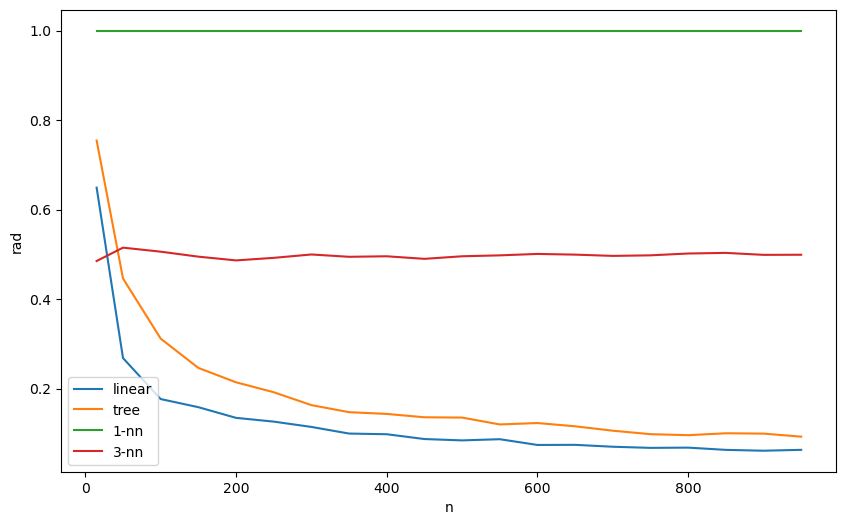

In [5]:
plt.figure(figsize=(10,6))
plt.plot(SIZES, rads[0], label='linear')
plt.plot(SIZES, rads[1], label='tree')
plt.plot(SIZES, rads[2], label='1-nn')
plt.plot(SIZES, rads[3], label='3-nn')

plt.xlabel('n')
plt.ylabel('rad')
plt.legend()
plt.show()